In [1]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")  
sns.set(style="whitegrid", color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
from sklearn.ensemble import RandomForestRegressor,StackingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

In [2]:
df_full = pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
df_full.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

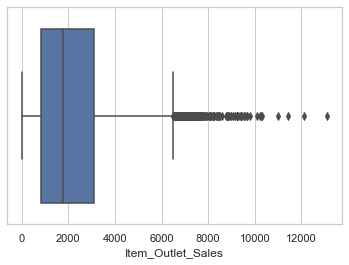

In [3]:
ax = sns.boxplot(x=df_full.Item_Outlet_Sales)

#### We can observe that values of sales above 10000 are outliers

In [4]:
df_full.drop(df_full[(df_full['Item_Outlet_Sales'] > 10000)].index, inplace=True)

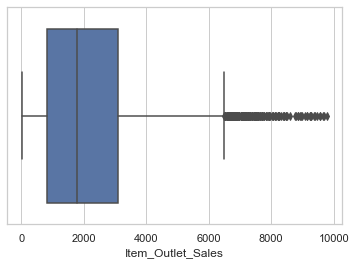

In [5]:
ax = sns.boxplot(x=df_full.Item_Outlet_Sales)

The outliers have been removed.

In [6]:
pred_df=df_full[df_full['Item_Outlet_Sales'].isna()]
df = df_full.dropna()

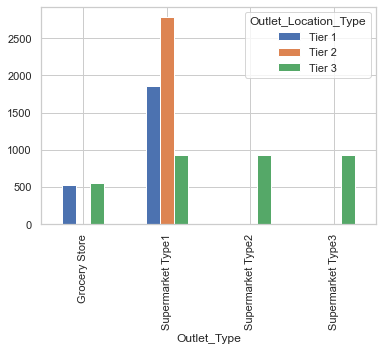

In [9]:
pd.crosstab(df.Outlet_Type,df.Outlet_Location_Type).plot(kind='bar',sort_columns=True)
plt.show()

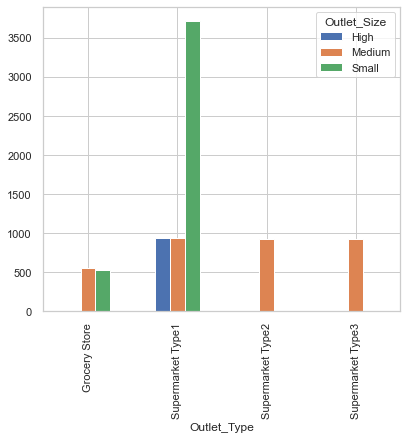

In [8]:
pd.crosstab(df.Outlet_Type,df.Outlet_Size).plot(kind='bar')
plt.show()

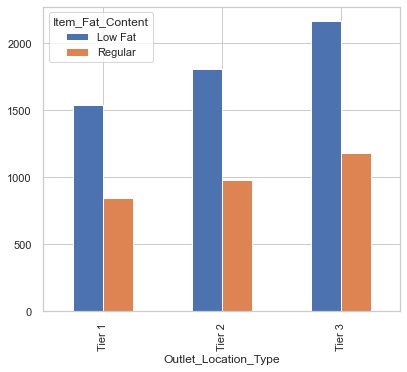

In [9]:
pd.crosstab(df.Outlet_Location_Type,df.Item_Fat_Content).plot(kind='bar')
plt.show()

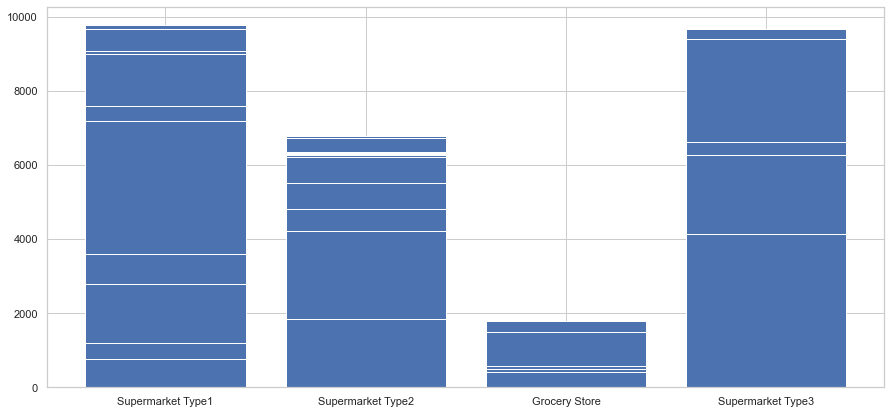

In [12]:
plt.figure(figsize=(15,7))
plt.bar(df.Outlet_Type,df.Item_Outlet_Sales)
plt.show()

###### We can observe that sales of Low Fat items is more as compared to Regular items acrss all types of stores thus stores should prioritize Low Fat products
###### We can observe that the size of the grocery stores is either small or medium while, supermarket type 2 & 3 are medium sized and Supermarket Type 1 are in all the sizes majority being small
###### The total sales figure is highest in Supermarket Type 1 and Type 3 ,followed by Supermarket Type 2 and the least sales are accounted by Grocery stores

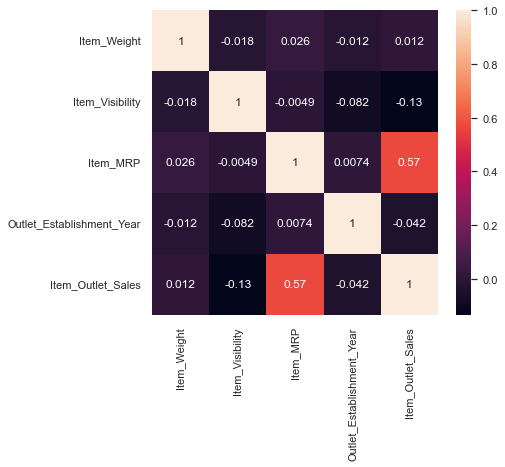

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()

###### We can observe that Item MRP and Item Visibility affects the overall sale of the product
###### Also there in no collinearlity between the variables of the x

##### Selecting columns required for predicting sales figure

In [14]:
req_data = df[['Item_Fat_Content','Item_Visibility','Item_MRP','Outlet_Size',
               'Outlet_Location_Type','Outlet_Type']]
Y = df["Item_Outlet_Sales"]

In [15]:
fat_dummies = pd.get_dummies(req_data.Item_Fat_Content, prefix="fat_content")
size_dummies = pd.get_dummies(req_data.Outlet_Size, prefix="outlet_size")
loc_dummies = pd.get_dummies(req_data.Outlet_Location_Type, prefix="loc")
type_dummies = pd.get_dummies(req_data.Outlet_Location_Type, prefix="loc")
req_data_with_dummies = pd.concat([req_data,fat_dummies,
                                   size_dummies,loc_dummies,
                                   type_dummies],
                                  axis=1)

In [17]:
size_dummies[:5]

,outlet_size_High,outlet_size_Medium,outlet_size_Small
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


In [19]:
X = req_data_with_dummies.drop(["Item_Fat_Content",'Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [24]:
X_train.columns

Index(['Item_Visibility', 'Item_MRP', 'fat_content_Low Fat',
       'fat_content_Regular', 'outlet_size_High', 'outlet_size_Medium',
       'outlet_size_Small', 'loc_Tier 1', 'loc_Tier 2', 'loc_Tier 3',
       'loc_Tier 1', 'loc_Tier 2', 'loc_Tier 3'],
      dtype='object')

In [23]:
dtc = DecisionTreeRegressor(max_depth=3)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_pred,y_test)
RMSE=np.sqrt(MSE)
(MAE,RMSE,dtc.score(X_test, y_test) )

(983.9321164859438, 1336.3943873882329, 0.3283611549745419)

In [22]:
pd.DataFrame({"actual_data":y_test,"Predicted Data":y_pred})

,actual_data,Predicted Data
4015,1406.1696,1594.674345
7847,4211.1850,2878.721271
2201,1223.0746,1594.674345
5986,2759.0752,2878.721271
1062,5510.8266,2878.721271
...,...,...
2069,666.4658,1594.674345
3616,2897.5616,2878.721271
6291,441.4254,624.552616
549,2386.2272,2878.721271


In [17]:
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_pred,y_test)
RMSE=np.sqrt(MSE)
(MAE,RMSE,lin.score(X_test, y_test) * 100)

(960.9992773683579, 1288.9730590383094, 37.51810387276754)

In [18]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_pred,y_test)
RMSE=np.sqrt(MSE)
(MAE,RMSE,knn.score(X_test, y_test) * 100)

(1030.1370195654727, 1403.3268722705864, 25.939915493200672)

In [25]:
rf = RandomForestRegressor(n_estimators=500,max_depth=7)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_pred,y_test)
RMSE=np.sqrt(MSE)
(MAE,RMSE,rf.score(X_test, y_test) )

(931.3880446770395, 1268.1096535026163, 0.39524406750331953)

In [20]:
sr =AdaBoostRegressor()
sr.fit(X_train, y_train)
y_pred = sr.predict(X_test)
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_pred,y_test)
RMSE=np.sqrt(MSE)
(MAE,RMSE,sr.score(X_test, y_test) * 100)

(1020.7299535611268, 1355.7532652892492, 30.876162862372404)

###### Observing the results we can conclude that RandomForest Regressor  has the highest score i.e.39.57 also the errors values as quite low compared to other models thus its the best model to get predictions for the given dataset

In [21]:
predict_df = pred_df[['Item_Fat_Content','Item_Visibility','Item_MRP','Outlet_Size',
               'Outlet_Location_Type','Outlet_Type']]
fat_dummies = pd.get_dummies(predict_df.Item_Fat_Content, prefix="fat_content")
size_dummies = pd.get_dummies(predict_df.Outlet_Size, prefix="outlet_size")
loc_dummies = pd.get_dummies(predict_df.Outlet_Location_Type, prefix="loc")
type_dummies = pd.get_dummies(predict_df.Outlet_Location_Type, prefix="loc")
predict_df_with_dummies = pd.concat([predict_df,fat_dummies,
                                   size_dummies,loc_dummies,
                                   type_dummies],
                                  axis=1)
X_pred = predict_df_with_dummies.drop(["Item_Fat_Content",'Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)

In [22]:
rf = RandomForestRegressor(n_estimators=500,max_depth=7)
rf.fit(X,Y)
pred_df["Item_Outlet_Sales"] = rf.predict(X_pred)

In [23]:
pred_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1603.696627
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,1412.735388
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,3329.532284
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,2633.174543
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,3387.575149
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2016.550045
14200,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2485.771103
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,1838.015593
14202,FDJ26,15.300,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,3489.780012


In [24]:
pred_df.to_csv("Predicted Sales")